# Transects from HYCOM1 test

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean as cm



In [2]:
db='/g/data/ik11/outputs/mom6-panan/panant.db'
session=cc.database.create_session(db)

In [3]:
client = Client()
client

<Client: 'tcp://127.0.0.1:42519' processes=4 threads=16, memory=44.92 GiB>

In [10]:
def plot_transect(xloc):
    h = cc.querying.getvar('panant-hycom1', 'h', session,attrs={'cell_methods':'area:mean zl:sum yh:mean xh:mean time: mean'}).isel(time=-1).sel(xh=xloc,method='nearest').load()
    u = cc.querying.getvar('panant-hycom1', 'u', session,attrs={'cell_methods':'zl:mean yh:mean xq:point time: mean'}).isel(time=-1).sel(xq=xloc,method='nearest').load()

    # Based on Ashley's fix_zcoord function
    # Technically, h and u are half a gridpoint off ... fix later!
    depth = h.cumsum(dim='zl').values
    new_u = xr.DataArray(data=u.values,dims=["zl", "yh"],
            coords=dict(yh=(["yh"], u.yh.values),depth=(["zl", "yh"], depth)),
            attrs= u.attrs)

    plt.figure(figsize=(15,10))
    plt.subplot(211)
    p1 = new_u.plot(y = "depth",add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(u.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([0,500])
    plt.gca().invert_yaxis()
    plt.title('Zonal velocity, %d °E'%xloc)

    plt.subplot(212)
    new_u.plot(y = "depth",add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(u.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([500,5500])
    plt.gca().invert_yaxis()

    plt.subplots_adjust(hspace=0)

    ax_c = plt.axes([0.92,0.3,0.01,0.4])
    plt.colorbar(p1,ax_c)

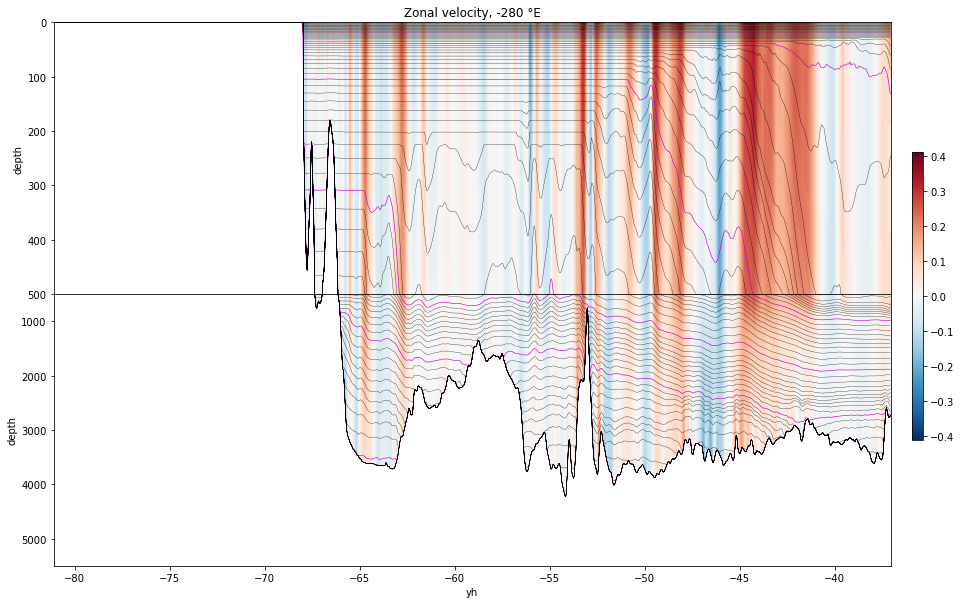

In [11]:
plot_transect(-280)

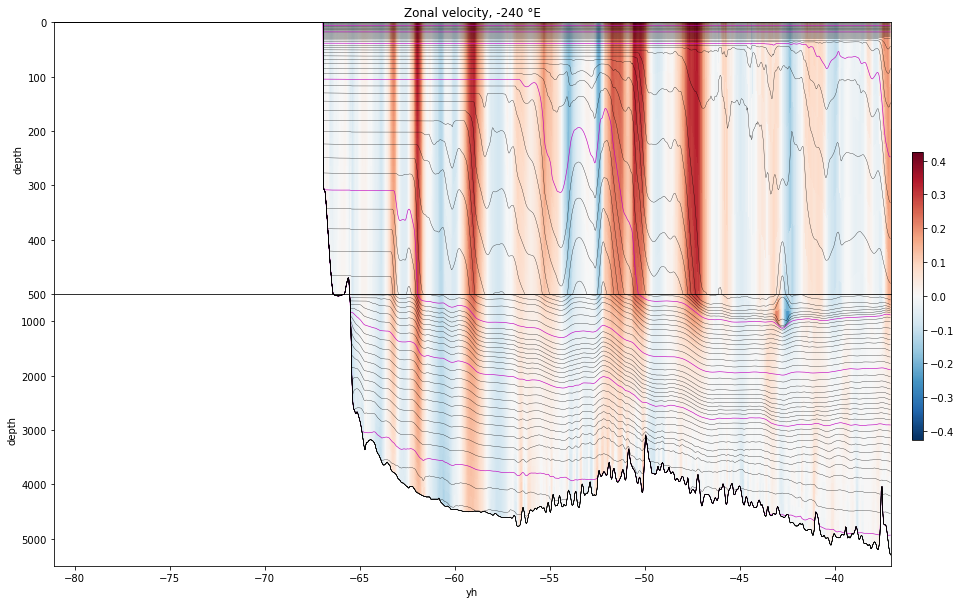

In [12]:
plot_transect(-240)

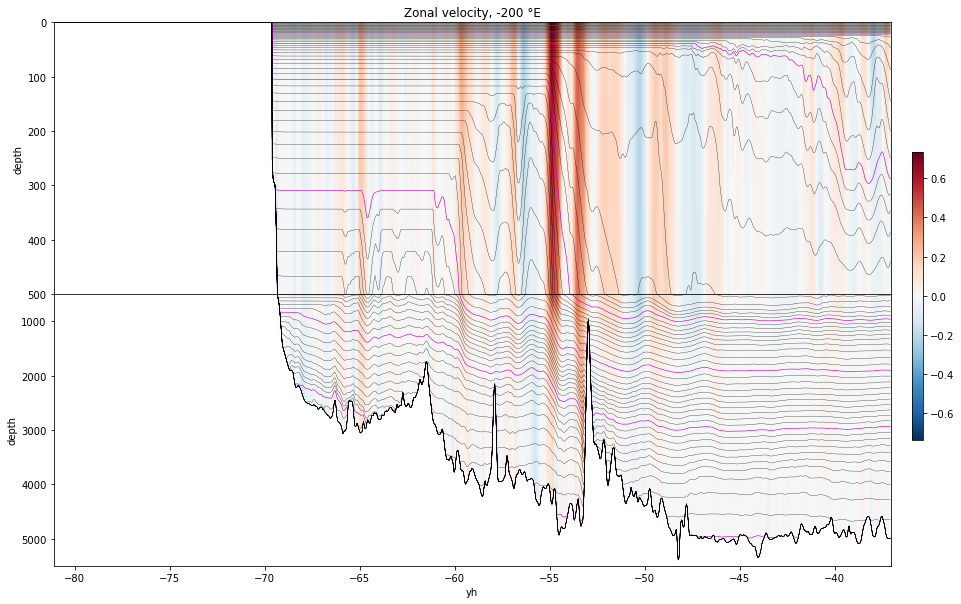

In [13]:
plot_transect(-200)

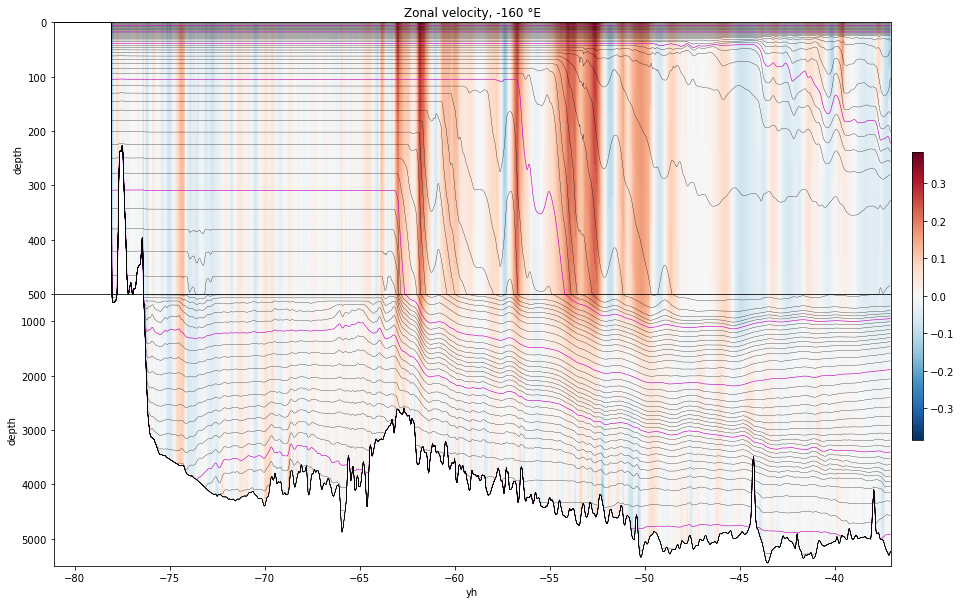

In [14]:
plot_transect(-160)

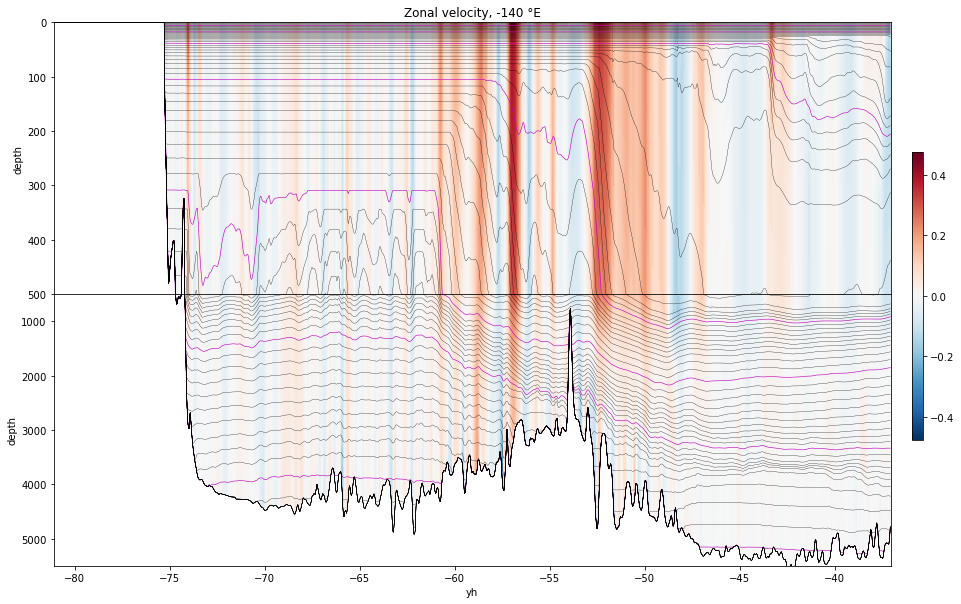

In [15]:
plot_transect(-140)

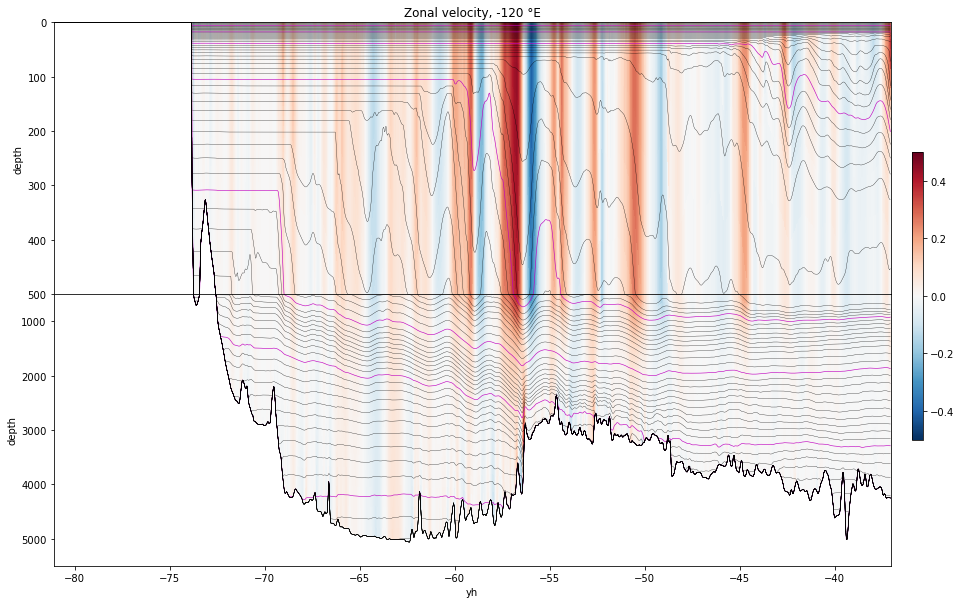

In [16]:
plot_transect(-120)

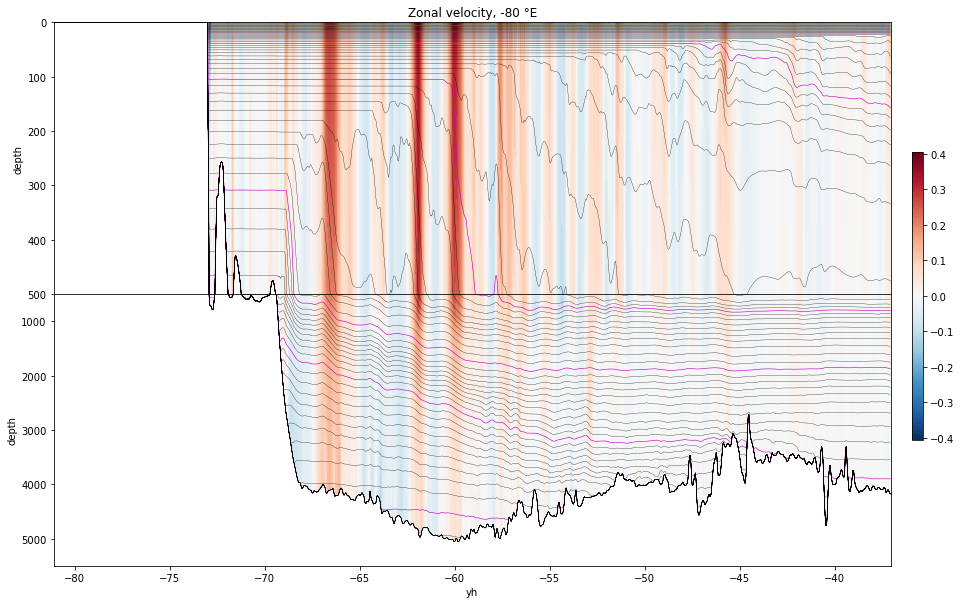

In [17]:
plot_transect(-80)

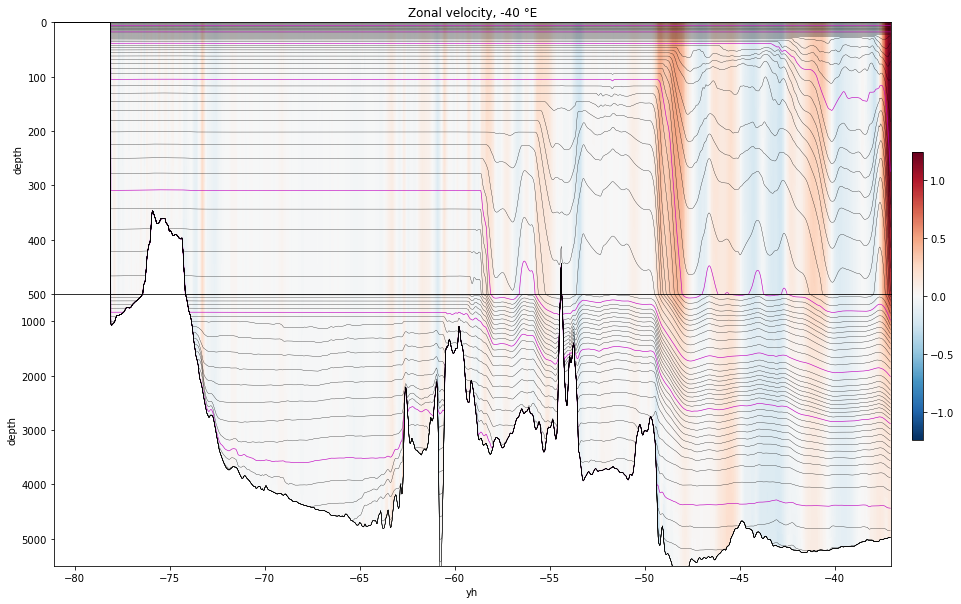

In [18]:
plot_transect(-40)

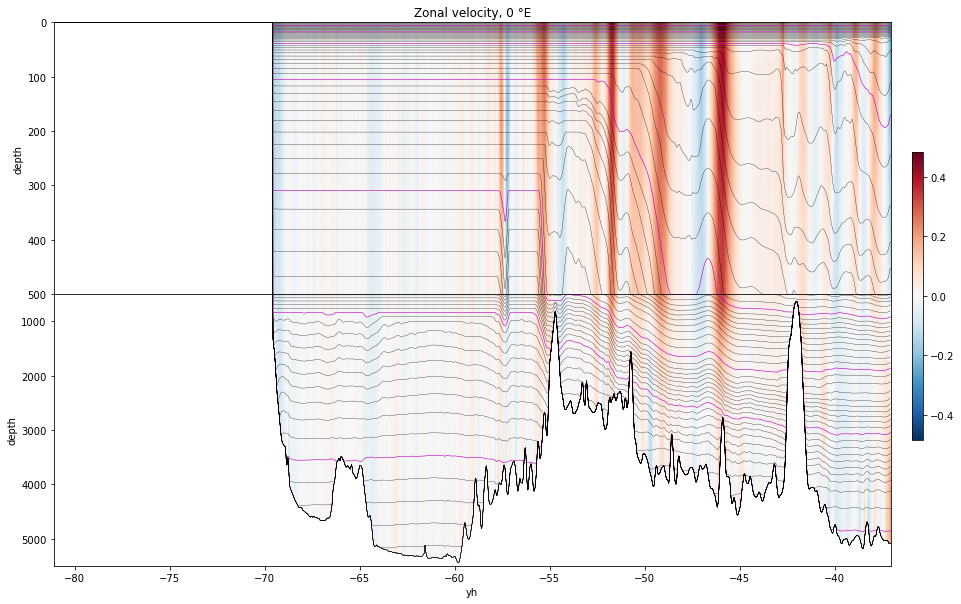

In [19]:
plot_transect(0)

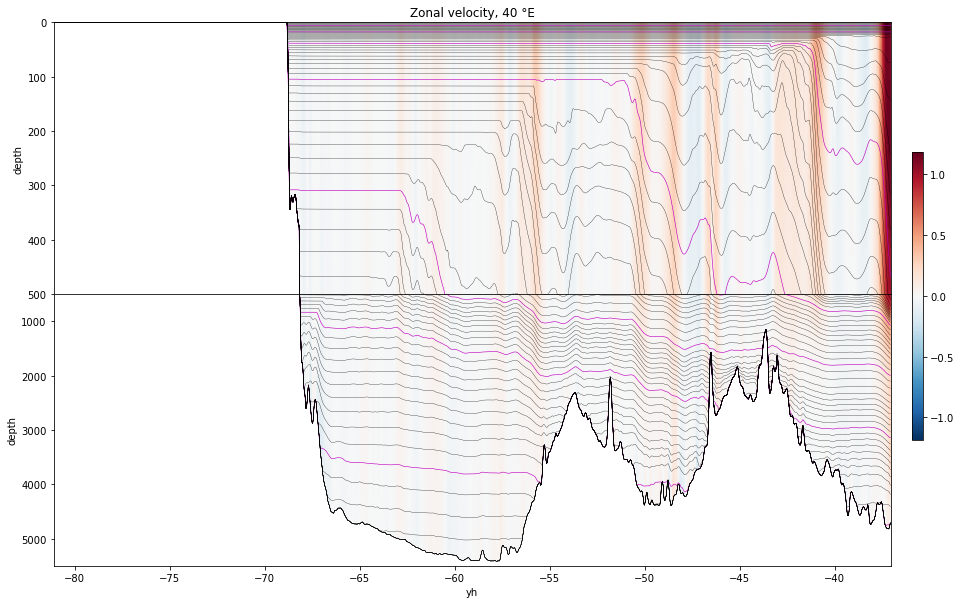

In [20]:
plot_transect(40)

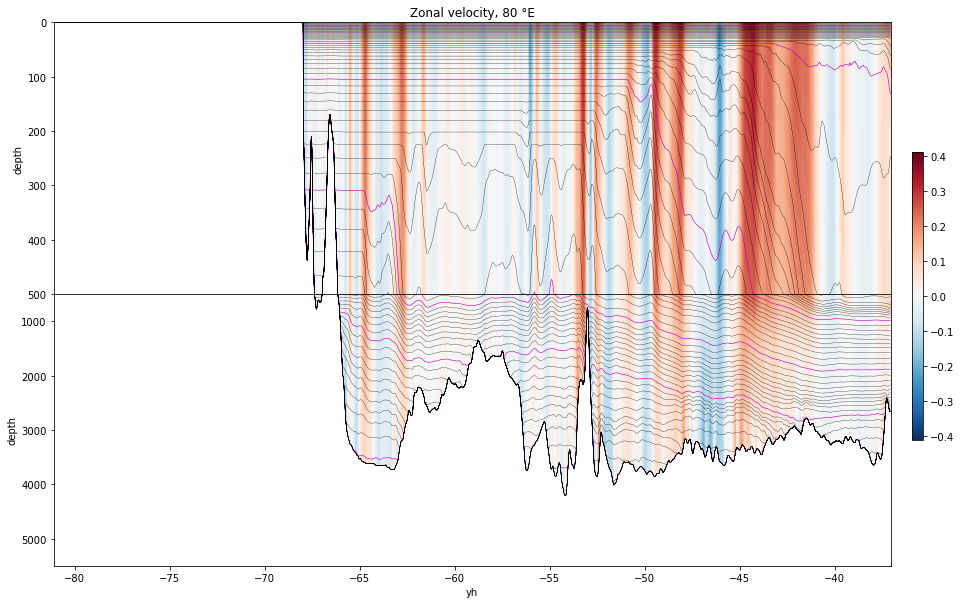

In [21]:
plot_transect(80)

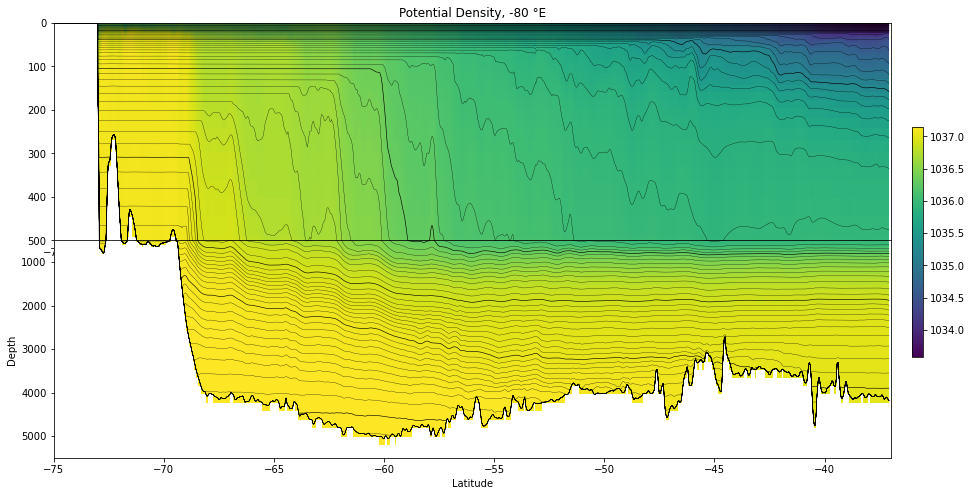

In [22]:
xloc = -80
h = cc.querying.getvar('panant-hycom1', 'h', session,attrs={'cell_methods':'area:mean zl:sum yh:mean xh:mean time: mean'}).isel(time=-1).sel(xh=xloc,method='nearest').load()
rhopot2 = cc.querying.getvar('panant-hycom1', 'rhopot2', session).isel(time=-1).sel(xh=xloc,method='nearest').load()
depth = h.cumsum(dim='zl').values

plt.figure(figsize=(15,8))
plt.subplot(211)
rhopot2.plot(add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.6)
    else:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.3)
plt.ylim([0,500])
plt.gca().invert_yaxis()
plt.title('Potential Density, %d °E'%xloc)
plt.xlim([-75,-37])
plt.ylabel('')

plt.subplot(212)
p1=rhopot2.plot(add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.6)
    else:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.3)
plt.ylim([500,5500])
plt.gca().invert_yaxis()
plt.xlim([-75,-37])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('')

plt.subplots_adjust(hspace=0)

ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(p1,ax_c)

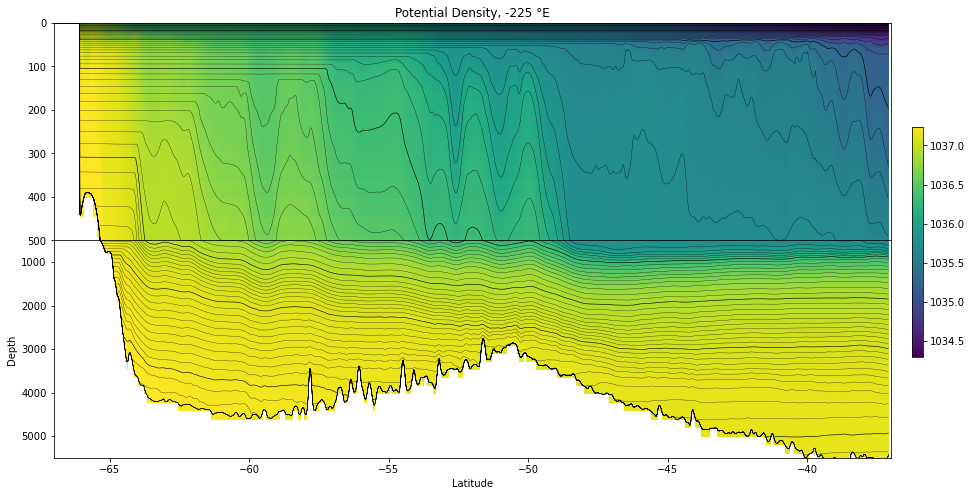

In [24]:
xloc = -225
h = cc.querying.getvar('panant-hycom1', 'h', session,attrs={'cell_methods':'area:mean zl:sum yh:mean xh:mean time: mean'}).isel(time=-1).sel(xh=xloc,method='nearest').load()
rhopot2 = cc.querying.getvar('panant-hycom1', 'rhopot2', session).isel(time=-1).sel(xh=xloc,method='nearest').load()
depth = h.cumsum(dim='zl').values

plt.figure(figsize=(15,8))
plt.subplot(211)
rhopot2.plot(add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.6)
    else:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.3)
plt.ylim([0,500])
plt.gca().invert_yaxis()
plt.title('Potential Density, %d °E'%xloc)
plt.xlim([-67,-37])
plt.ylabel('')

plt.subplot(212)
p1=rhopot2.plot(add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.6)
    else:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.3)
plt.ylim([500,5500])
plt.gca().invert_yaxis()
plt.xlim([-67,-37])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('')

plt.subplots_adjust(hspace=0)

ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(p1,ax_c)
#plt.savefig('figures/hycom1.png')

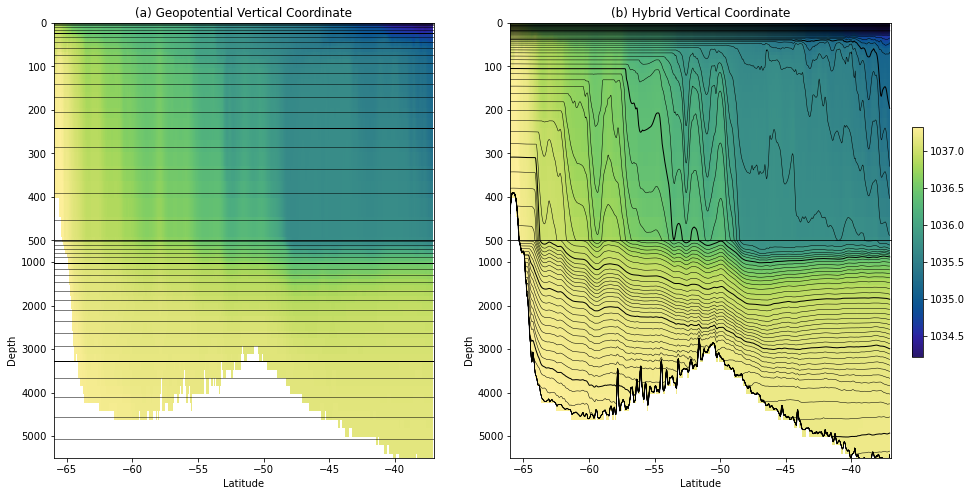

In [26]:
xloc = -225
plt.figure(figsize=(15,8))

h = cc.querying.getvar('panant-hycom1', 'h', session,attrs={'cell_methods':'area:mean zl:sum yh:mean xh:mean time: mean'}).isel(time=-1).sel(xh=xloc,method='nearest').load()
rhopot2 = cc.querying.getvar('panant-hycom1', 'rhopot2', session).isel(time=-1).sel(xh=xloc,method='nearest').load()
depth = h.cumsum(dim='zl').values


plt.subplot(222)
rhopot2.plot(cmap = cm.cm.haline,add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=1.0)
    else:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.5)
plt.ylim([0,500])
plt.gca().invert_yaxis()
plt.title('Potential Density, %d °E'%xloc)
plt.xlim([-66,-37])
plt.ylabel('')
plt.title('(b) Hybrid Vertical Coordinate')

plt.subplot(224)
p1=rhopot2.plot(cmap = cm.cm.haline,add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=1.0)
    else:
        plt.plot(rhopot2.yh.values,depth[ii,:],'k',linewidth=0.5)
plt.ylim([500,5500])
plt.gca().invert_yaxis()
plt.xlim([-66,-37])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('')

rhopot2 = cc.querying.getvar('panant-v2', 'rhopot2', session).isel(time=-1).sel(xh=xloc,method='nearest').load()
depth = rhopot2.z_l.cumsum(dim='z_l').values

plt.subplot(221)
rhopot2.plot(cmap = cm.cm.haline,add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.axhline(depth[ii],color='k',linewidth=1.0)
    else:
        plt.axhline(depth[ii],color='k',linewidth=0.5)
plt.ylim([0,500])
plt.gca().invert_yaxis()
plt.title('Potential Density, %d °E'%xloc)
plt.xlim([-66,-37])
plt.ylabel('')
plt.title('(a) Geopotential Vertical Coordinate')

plt.subplot(223)
p1=rhopot2.plot(cmap = cm.cm.haline,add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.axhline(depth[ii],color='k',linewidth=1.0)
    else:
        plt.axhline(depth[ii],color='k',linewidth=0.5)
plt.ylim([500,5500])
plt.gca().invert_yaxis()
plt.xlim([-66,-37])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('')

plt.subplots_adjust(hspace=0)

ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(p1,ax_c)
#plt.savefig('figures/zstar_v_hycom1.png',dpi=150)